
 Model Performance on Training Set:
   - Mean Absolute Error (MAE):     33626.55
   - Root Mean Squared Error (RMSE): 49352.23
   - R² Score:                        0.6138


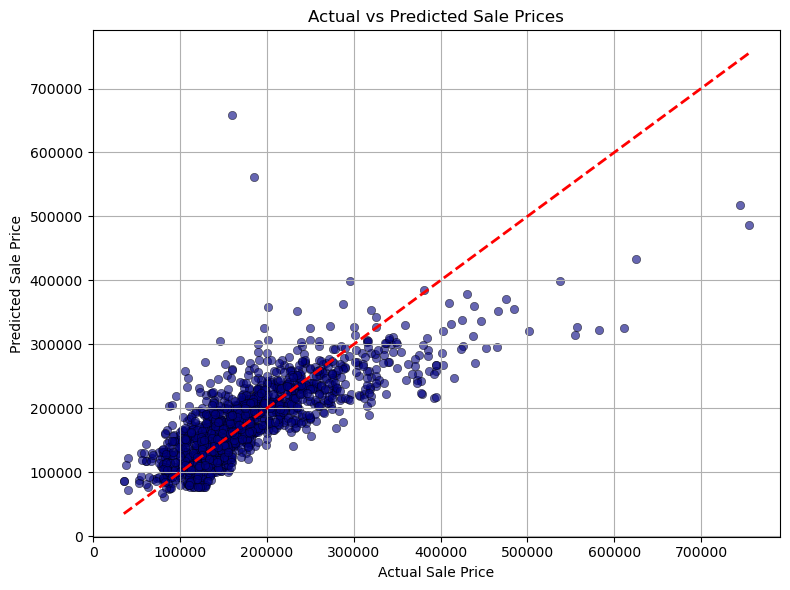

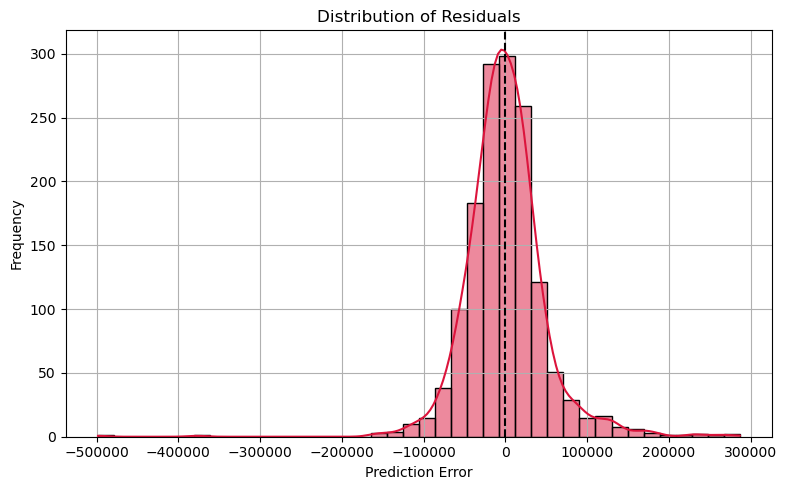

In [41]:
"""
🏠 House Price Prediction using Linear Regression

This script trains a basic linear regression model to predict house prices 
based on selected features using the House Price dataset.

Author: Dipti Sinha
Date: 2025-06-26
"""

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Feature Engineering: Create a 'TotalBathrooms' column
for df in [train_df, test_df]:
    df['TotalBathrooms'] = (
        df['FullBath'].fillna(0) +
        0.5 * df['HalfBath'].fillna(0) +
        df['BsmtFullBath'].fillna(0) +
        0.5 * df['BsmtHalfBath'].fillna(0)
    )

# Define input features
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']

# Handle missing values with median imputation
X_train = train_df[features].fillna(train_df[features].median())
y_train = train_df['SalePrice']
X_test = test_df[features].fillna(train_df[features].median())

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
predicted_prices = model.predict(X_test)

# Evaluate performance on training set
train_preds = model.predict(X_train)
mae = mean_absolute_error(y_train, train_preds)
rmse = root_mean_squared_error(y_train, train_preds)
r2 = r2_score(y_train, train_preds)

print("\n Model Performance on Training Set:")
print(f"   - Mean Absolute Error (MAE):     {mae:.2f}")
print(f"   - Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"   - R² Score:                        {r2:.4f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=train_preds, color='navy', alpha=0.6, edgecolor='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize Residuals
residuals = y_train - train_preds
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40, color='crimson')
plt.axvline(0, linestyle='--', color='black')
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
